In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install config

In [ ]:
pip install websocket-client

     |████████████████████████████████| 53 kB 1.4 MB/s 


In [ ]:
!pip install alpaca-trade-api

     |████████████████████████████████| 1.3 MB 8.5 MB/s 
     |████████████████████████████████| 636 kB 34.4 MB/s 
     |████████████████████████████████| 273 kB 48.5 MB/s 
     |████████████████████████████████| 103 kB 49.1 MB/s 
     |████████████████████████████████| 271 kB 42.7 MB/s 
     |████████████████████████████████| 160 kB 43.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.3
    Uninstalling msgpack-1.0.3:
      Successfully uninstalled msgpack-1.0.3


In [ ]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
#import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
import os
#from dotenv import load_dotenv
import requests
import json
from getpass import getpass
import alpaca_trade_api as alpacaapi
import websocket
import _thread
import time
import yfinance as yf

In [ ]:
bitcoin = yf.Ticker("BTC-USD")
#current_btc = bitcoin.history(period='1d', interval="1m")[['Close']]
Bitcoin_df = bitcoin.history(start="2017-12-31", end="2021-12-07")

In [ ]:
ethereum = yf.Ticker("ETH-USD")
#current_btc = bitcoin.history(period='1d', interval="1m")[['Close']]
Ethereum_df = ethereum.history(start="2017-12-31", end="2021-12-07")

In [ ]:
litecoin = yf.Ticker("LTC-USD")
#current_btc = bitcoin.history(period='1d', interval="1m")[['Close']]
LiteCoin_df = litecoin.history(start="2017-12-31", end="2021-12-07")

In [ ]:
bitcoincash = yf.Ticker("BCH-USD")
BitcoinCash_df = bitcoincash.history(start="2017-12-31", end="2021-12-07")

In [ ]:
BitcoinCash_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-31,2376.959961,2627.949951,2350.030029,2533.010010,1300819968,0,0
2018-01-01,2534.820068,2534.860107,2389.520020,2432.540039,922812992,0,0
2018-01-02,2434.500000,2867.139893,2434.500000,2711.000000,1831229952,0,0
2018-01-03,2700.550049,2958.469971,2592.560059,2608.689941,4688840192,0,0
2018-01-04,2608.870117,2610.199951,2359.300049,2430.179932,5377260032,0,0


In [ ]:
# separate into individual dataframes

btc_signals_df=Bitcoin_df.loc[:, ["Close"]]
eth_signals_df=Ethereum_df.loc[:, ["Close"]]
ltc_signals_df=LiteCoin_df.loc[:, ["Close"]]
bch_signals_df=BitcoinCash_df.loc[:,["Close"]]

display(btc_signals_df.tail())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

,Close
Date,
2021-12-03,53598.246094
2021-12-04,49200.703125
2021-12-05,49368.847656
2021-12-06,50582.625000
2021-12-07,50700.085938


,Close
Date,
2017-12-31,756.732971
2018-01-01,772.640991
2018-01-02,884.443970
2018-01-03,962.719971
2018-01-04,980.921997


,Close
Date,
2017-12-31,232.095993
2018-01-01,229.033005
2018-01-02,255.684006
2018-01-03,245.367996
2018-01-04,241.369995


,Close
Date,
2017-12-31,2533.010010
2018-01-01,2432.540039
2018-01-02,2711.000000
2018-01-03,2608.689941
2018-01-04,2430.179932


In [ ]:
# use pct_change function to get actual returns and dropna

btc_signals_df["Actual Returns"]=btc_signals_df["Close"].pct_change()
eth_signals_df["Actual Returns"]=eth_signals_df["Close"].pct_change()
ltc_signals_df["Actual Returns"]=ltc_signals_df["Close"].pct_change()
bch_signals_df["Actual Returns"]=bch_signals_df["Close"].pct_change()

btc_signals_df=btc_signals_df.dropna()
eth_signals_df=eth_signals_df.dropna()
ltc_signals_df=ltc_signals_df.dropna()
bch_signals_df=bch_signals_df.dropna()

display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

,Close,Actual Returns
Date,,
2018-01-01,13657.200195,-0.035263
2018-01-02,14982.099609,0.097011
2018-01-03,15201.000000,0.014611
2018-01-04,15599.200195,0.026196
2018-01-05,17429.500000,0.117333


,Close,Actual Returns
Date,,
2018-01-01,772.640991,0.021022
2018-01-02,884.443970,0.144702
2018-01-03,962.719971,0.088503
2018-01-04,980.921997,0.018907
2018-01-05,997.719971,0.017125


,Close,Actual Returns
Date,,
2018-01-01,229.033005,-0.013197
2018-01-02,255.684006,0.116363
2018-01-03,245.367996,-0.040347
2018-01-04,241.369995,-0.016294
2018-01-05,249.270996,0.032734


,Close,Actual Returns
Date,,
2018-01-01,2432.540039,-0.039664
2018-01-02,2711.000000,0.114473
2018-01-03,2608.689941,-0.037739
2018-01-04,2430.179932,-0.068429
2018-01-05,2584.479980,0.063493


In [ ]:
# Set the short window and long window
short_window = 5
long_window = 30

# Generate the fast and slow simple moving averages 

btc_signals_df['SMA_Fast']=btc_signals_df['Close'].rolling(window=short_window).mean()
btc_signals_df['SMA_Slow']=btc_signals_df['Close'].rolling(window=long_window).mean()

In [ ]:
short_window = 5
long_window = 30

eth_signals_df['SMA_Fast']=eth_signals_df['Close'].rolling(window=short_window).mean()
eth_signals_df['SMA_Slow']=eth_signals_df['Close'].rolling(window=long_window).mean()

In [ ]:
short_window = 5
long_window = 30

ltc_signals_df['SMA_Fast']=ltc_signals_df['Close'].rolling(window=short_window).mean()
ltc_signals_df['SMA_Slow']=ltc_signals_df['Close'].rolling(window=long_window).mean()

In [ ]:
short_window = 5
long_window = 30

bch_signals_df['SMA_Fast']=bch_signals_df['Close'].rolling(window=short_window).mean()
bch_signals_df['SMA_Slow']=bch_signals_df['Close'].rolling(window=long_window).mean()

In [ ]:
#check your work
display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

,Close,Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2018-01-01,13657.200195,-0.035263,NaN,NaN
2018-01-02,14982.099609,0.097011,NaN,NaN
2018-01-03,15201.000000,0.014611,NaN,NaN
2018-01-04,15599.200195,0.026196,NaN,NaN
2018-01-05,17429.500000,0.117333,15373.8,NaN


,Close,Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2018-01-01,772.640991,0.021022,NaN,NaN
2018-01-02,884.443970,0.144702,NaN,NaN
2018-01-03,962.719971,0.088503,NaN,NaN
2018-01-04,980.921997,0.018907,NaN,NaN
2018-01-05,997.719971,0.017125,919.68938,NaN


,Close,Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2018-01-01,229.033005,-0.013197,NaN,NaN
2018-01-02,255.684006,0.116363,NaN,NaN
2018-01-03,245.367996,-0.040347,NaN,NaN
2018-01-04,241.369995,-0.016294,NaN,NaN
2018-01-05,249.270996,0.032734,244.1452,NaN


,Close,Actual Returns,SMA_Fast,SMA_Slow
Date,,,,
2018-01-01,2432.540039,-0.039664,NaN,NaN
2018-01-02,2711.000000,0.114473,NaN,NaN
2018-01-03,2608.689941,-0.037739,NaN,NaN
2018-01-04,2430.179932,-0.068429,NaN,NaN
2018-01-05,2584.479980,0.063493,2553.377979,NaN


In [ ]:
# add the  Signal column
btc_signals_df['Signal']=0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock 

btc_signals_df.loc[(btc_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock

btc_signals_df.loc[(btc_signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [ ]:
eth_signals_df['Signal']=0.0
eth_signals_df.loc[(eth_signals_df['Actual Returns'] >= 0), 'Signal'] = 1
eth_signals_df.loc[(eth_signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [ ]:
ltc_signals_df['Signal']=0.0
ltc_signals_df.loc[(ltc_signals_df['Actual Returns'] >= 0), 'Signal'] = 1
ltc_signals_df.loc[(ltc_signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [ ]:
bch_signals_df['Signal']=0.0
bch_signals_df.loc[(bch_signals_df['Actual Returns'] >= 0), 'Signal'] = 1
bch_signals_df.loc[(bch_signals_df['Actual Returns'] < 0), 'Signal'] = -1

In [ ]:
# check your work
display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

display(btc_signals_df.tail())
display(eth_signals_df.tail())
display(ltc_signals_df.tail())
display(bch_signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2018-01-01,13657.200195,-0.035263,NaN,NaN,-1.0
2018-01-02,14982.099609,0.097011,NaN,NaN,1.0
2018-01-03,15201.000000,0.014611,NaN,NaN,1.0
2018-01-04,15599.200195,0.026196,NaN,NaN,1.0
2018-01-05,17429.500000,0.117333,15373.8,NaN,1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2018-01-01,772.640991,0.021022,NaN,NaN,1.0
2018-01-02,884.443970,0.144702,NaN,NaN,1.0
2018-01-03,962.719971,0.088503,NaN,NaN,1.0
2018-01-04,980.921997,0.018907,NaN,NaN,1.0
2018-01-05,997.719971,0.017125,919.68938,NaN,1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2018-01-01,229.033005,-0.013197,NaN,NaN,-1.0
2018-01-02,255.684006,0.116363,NaN,NaN,1.0
2018-01-03,245.367996,-0.040347,NaN,NaN,-1.0
2018-01-04,241.369995,-0.016294,NaN,NaN,-1.0
2018-01-05,249.270996,0.032734,244.1452,NaN,1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2018-01-01,2432.540039,-0.039664,NaN,NaN,-1.0
2018-01-02,2711.000000,0.114473,NaN,NaN,1.0
2018-01-03,2608.689941,-0.037739,NaN,NaN,-1.0
2018-01-04,2430.179932,-0.068429,NaN,NaN,-1.0
2018-01-05,2584.479980,0.063493,2553.377979,NaN,1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2021-12-03,53598.246094,-0.050986,56423.576562,59958.323307,-1.0
2021-12-04,49200.703125,-0.082046,54702.403906,59549.939063,-1.0
2021-12-05,49368.847656,0.003418,53175.088281,59158.044792,1.0
2021-12-06,50582.625000,0.024586,51845.647656,58793.216276,1.0
2021-12-07,50700.085938,0.002322,50690.101562,58372.319531,1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2021-12-03,4220.706055,-0.064415,4479.116504,4427.541341,-1.0
2021-12-04,4119.587402,-0.023958,4414.012988,4413.616781,-1.0
2021-12-05,4198.322754,0.019112,4327.381738,4404.019434,1.0
2021-12-06,4358.737305,0.038209,4281.731152,4398.591309,1.0
2021-12-07,4315.061523,-0.010020,4242.483008,4388.408203,-1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2021-12-03,188.099716,-0.075630,202.889069,221.838414,-1.0
2021-12-04,163.052704,-0.133158,194.325568,220.507905,-1.0
2021-12-05,156.409790,-0.040741,184.004617,219.070300,-1.0
2021-12-06,161.886520,0.035015,174.587671,217.870972,1.0
2021-12-07,162.292862,0.002510,166.348318,216.545690,1.0


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal
Date,,,,,
2021-12-03,532.355042,-0.051822,562.302795,601.635891,-1.0
2021-12-04,473.850800,-0.109897,541.848602,597.550601,-1.0
2021-12-05,453.490265,-0.042968,518.440723,592.705076,-1.0
2021-12-06,475.756775,0.049100,499.380701,588.922001,1.0
2021-12-07,475.160278,-0.001254,482.122632,584.731301,-1.0


In [ ]:
# Add Strategy Returns column
btc_signals_df['Strategy Returns'] = btc_signals_df['Actual Returns'] * btc_signals_df['Signal'].shift()

In [ ]:
eth_signals_df['Strategy Returns'] = eth_signals_df['Actual Returns'] * eth_signals_df['Signal'].shift()

In [ ]:
ltc_signals_df['Strategy Returns'] = ltc_signals_df['Actual Returns'] * ltc_signals_df['Signal'].shift()

In [ ]:
bch_signals_df['Strategy Returns'] = bch_signals_df['Actual Returns'] * bch_signals_df['Signal'].shift()

In [ ]:
# check your work
display(btc_signals_df.head())
display(eth_signals_df.head())
display(ltc_signals_df.head())
display(bch_signals_df.head())

display(btc_signals_df.tail())
display(eth_signals_df.tail())
display(ltc_signals_df.tail())
display(bch_signals_df.tail())

,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2018-01-01,13657.200195,-0.035263,NaN,NaN,-1.0,NaN
2018-01-02,14982.099609,0.097011,NaN,NaN,1.0,-0.097011
2018-01-03,15201.000000,0.014611,NaN,NaN,1.0,0.014611
2018-01-04,15599.200195,0.026196,NaN,NaN,1.0,0.026196
2018-01-05,17429.500000,0.117333,15373.8,NaN,1.0,0.117333


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2018-01-01,772.640991,0.021022,NaN,NaN,1.0,NaN
2018-01-02,884.443970,0.144702,NaN,NaN,1.0,0.144702
2018-01-03,962.719971,0.088503,NaN,NaN,1.0,0.088503
2018-01-04,980.921997,0.018907,NaN,NaN,1.0,0.018907
2018-01-05,997.719971,0.017125,919.68938,NaN,1.0,0.017125


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2018-01-01,229.033005,-0.013197,NaN,NaN,-1.0,NaN
2018-01-02,255.684006,0.116363,NaN,NaN,1.0,-0.116363
2018-01-03,245.367996,-0.040347,NaN,NaN,-1.0,-0.040347
2018-01-04,241.369995,-0.016294,NaN,NaN,-1.0,0.016294
2018-01-05,249.270996,0.032734,244.1452,NaN,1.0,-0.032734


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2018-01-01,2432.540039,-0.039664,NaN,NaN,-1.0,NaN
2018-01-02,2711.000000,0.114473,NaN,NaN,1.0,-0.114473
2018-01-03,2608.689941,-0.037739,NaN,NaN,-1.0,-0.037739
2018-01-04,2430.179932,-0.068429,NaN,NaN,-1.0,0.068429
2018-01-05,2584.479980,0.063493,2553.377979,NaN,1.0,-0.063493


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2021-12-03,53598.246094,-0.050986,56423.576562,59958.323307,-1.0,0.050986
2021-12-04,49200.703125,-0.082046,54702.403906,59549.939063,-1.0,0.082046
2021-12-05,49368.847656,0.003418,53175.088281,59158.044792,1.0,-0.003418
2021-12-06,50582.625000,0.024586,51845.647656,58793.216276,1.0,0.024586
2021-12-07,50700.085938,0.002322,50690.101562,58372.319531,1.0,0.002322


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2021-12-03,4220.706055,-0.064415,4479.116504,4427.541341,-1.0,0.064415
2021-12-04,4119.587402,-0.023958,4414.012988,4413.616781,-1.0,0.023958
2021-12-05,4198.322754,0.019112,4327.381738,4404.019434,1.0,-0.019112
2021-12-06,4358.737305,0.038209,4281.731152,4398.591309,1.0,0.038209
2021-12-07,4315.061523,-0.010020,4242.483008,4388.408203,-1.0,-0.010020


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2021-12-03,188.099716,-0.075630,202.889069,221.838414,-1.0,0.075630
2021-12-04,163.052704,-0.133158,194.325568,220.507905,-1.0,0.133158
2021-12-05,156.409790,-0.040741,184.004617,219.070300,-1.0,0.040741
2021-12-06,161.886520,0.035015,174.587671,217.870972,1.0,-0.035015
2021-12-07,162.292862,0.002510,166.348318,216.545690,1.0,0.002510


,Close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
Date,,,,,,
2021-12-03,532.355042,-0.051822,562.302795,601.635891,-1.0,0.051822
2021-12-04,473.850800,-0.109897,541.848602,597.550601,-1.0,0.109897
2021-12-05,453.490265,-0.042968,518.440723,592.705076,-1.0,0.042968
2021-12-06,475.756775,0.049100,499.380701,588.922001,1.0,-0.049100
2021-12-07,475.160278,-0.001254,482.122632,584.731301,-1.0,-0.001254


In [ ]:
# create X and y variables
btc_X = btc_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
btc_y = btc_signals_df['Signal']

In [ ]:
eth_X = eth_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
eth_y = eth_signals_df['Signal']

In [ ]:
ltc_X = ltc_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
ltc_y = ltc_signals_df['Signal']

In [ ]:
bch_X = bch_signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()
bch_y = bch_signals_df['Signal']

In [ ]:
# set training start and end times
btc_training_begin = btc_X.index.min()
btc_training_end = btc_X.index.min() + DateOffset(months=6)

In [ ]:
eth_training_begin = eth_X.index.min()
eth_training_end = eth_X.index.min() + DateOffset(months=6)

In [ ]:
ltc_training_begin = ltc_X.index.min()
ltc_training_end = ltc_X.index.min() + DateOffset(months=6)

In [ ]:
bch_training_begin = bch_X.index.min()
bch_training_end = bch_X.index.min() + DateOffset(months=6)

In [ ]:
# create train and test variables
btc_X_train = btc_X.loc[btc_training_begin:btc_training_end]
btc_y_train = btc_y.loc[btc_training_begin:btc_training_end]

btc_X_test = btc_X.loc[btc_training_end+DateOffset(hours=1):]
btc_y_test = btc_y.loc[btc_training_end+DateOffset(hours=1):]

In [ ]:
eth_X_train = eth_X.loc[eth_training_begin:eth_training_end]
eth_y_train = eth_y.loc[eth_training_begin:eth_training_end]

eth_X_test = eth_X.loc[eth_training_end+DateOffset(hours=1):]
eth_y_test = eth_y.loc[eth_training_end+DateOffset(hours=1):]

In [ ]:
ltc_X_train = ltc_X.loc[ltc_training_begin:ltc_training_end]
ltc_y_train = ltc_y.loc[ltc_training_begin:ltc_training_end]

ltc_X_test = ltc_X.loc[ltc_training_end+DateOffset(hours=1):]
ltc_y_test = ltc_y.loc[ltc_training_end+DateOffset(hours=1):]

In [ ]:
bch_X_train = bch_X.loc[bch_training_begin:bch_training_end]
bch_y_train = bch_y.loc[bch_training_begin:bch_training_end]

bch_X_test = bch_X.loc[bch_training_end+DateOffset(hours=1):]
bch_y_test = bch_y.loc[bch_training_end+DateOffset(hours=1):]

In [ ]:
# scale the features
btc_scaler = StandardScaler()
btc_X_scaler = btc_scaler.fit(btc_X_train)
btc_X_train_scaled = btc_X_scaler.transform(btc_X_train)
btc_X_test_scaled = btc_X_scaler.transform(btc_X_test)

In [ ]:
eth_scaler = StandardScaler()
eth_X_scaler = eth_scaler.fit(eth_X_train)
eth_X_train_scaled = eth_X_scaler.transform(eth_X_train)
eth_X_test_scaled = eth_X_scaler.transform(eth_X_test)

In [ ]:
ltc_scaler = StandardScaler()
ltc_X_scaler = ltc_scaler.fit(ltc_X_train)
ltc_X_train_scaled = ltc_X_scaler.transform(ltc_X_train)
ltc_X_test_scaled = ltc_X_scaler.transform(ltc_X_test)

In [ ]:
bch_scaler = StandardScaler()
bch_X_scaler = bch_scaler.fit(bch_X_train)
bch_X_train_scaled = bch_X_scaler.transform(bch_X_train)
bch_X_test_scaled = bch_X_scaler.transform(bch_X_test)

In [ ]:
# use SKLearn SVC classifier to fit and predict
btc_model = svm.SVC()
btc_model = btc_model.fit(btc_X_train_scaled, btc_y_train)
btc_pred = btc_model.predict(btc_X_test_scaled)
btc_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
eth_model = svm.SVC()
eth_model = eth_model.fit(eth_X_train_scaled, eth_y_train)
eth_pred = eth_model.predict(eth_X_test_scaled)
eth_pred

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [ ]:
ltc_model = svm.SVC()
ltc_model = ltc_model.fit(ltc_X_train_scaled, ltc_y_train)
ltc_pred = ltc_model.predict(ltc_X_test_scaled)
ltc_pred

array([-1., -1., -1., ..., -1., -1., -1.])

In [ ]:
bch_model = svm.SVC()
bch_model = bch_model.fit(bch_X_train_scaled, bch_y_train)
bch_pred = bch_model.predict(bch_X_test_scaled)
bch_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# review the classification report
btc_testing_report = classification_report(btc_y_test, btc_pred)
print(btc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.32      0.39       576
         1.0       0.54      0.70      0.61       645

    accuracy                           0.52      1221
   macro avg       0.52      0.51      0.50      1221
weighted avg       0.52      0.52      0.51      1221



In [ ]:
eth_testing_report = classification_report(eth_y_test, eth_pred)
print(eth_testing_report)

              precision    recall  f1-score   support

        -1.0       0.47      0.72      0.57       578
         1.0       0.53      0.28      0.37       643

    accuracy                           0.49      1221
   macro avg       0.50      0.50      0.47      1221
weighted avg       0.50      0.49      0.46      1221



In [ ]:
ltc_testing_report = classification_report(ltc_y_test, ltc_pred)
print(ltc_testing_report)

              precision    recall  f1-score   support

        -1.0       0.49      0.99      0.66       601
         1.0       0.56      0.01      0.02       620

    accuracy                           0.49      1221
   macro avg       0.52      0.50      0.34      1221
weighted avg       0.52      0.49      0.33      1221



In [ ]:
bch_testing_report = classification_report(bch_y_test, bch_pred)
print(bch_testing_report)

              precision    recall  f1-score   support

        -1.0       0.57      0.13      0.21       621
         1.0       0.50      0.90      0.64       600

    accuracy                           0.51      1221
   macro avg       0.53      0.51      0.42      1221
weighted avg       0.53      0.51      0.42      1221



In [ ]:
# Create a new data frame to compare Actual Returns and Strategy Returns
btc_predictions_df = pd.DataFrame(index=btc_X_test.index)
btc_predictions_df['Predicted'] = btc_pred
btc_predictions_df['Actual Returns'] = btc_signals_df['Actual Returns']
btc_predictions_df['Strategy Returns'] = (
    btc_predictions_df['Actual Returns'] * btc_predictions_df['Predicted'])
display(btc_predictions_df.tail(100))

,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-08-30,1.0,-0.036348,-0.036348
2021-08-31,1.0,0.002374,0.002374
2021-09-01,1.0,0.035626,0.035626
2021-09-02,1.0,0.009841,0.009841
2021-09-03,1.0,0.014143,0.014143
...,...,...,...
2021-12-03,1.0,-0.050986,-0.050986
2021-12-04,1.0,-0.082046,-0.082046
2021-12-05,1.0,0.003418,0.003418


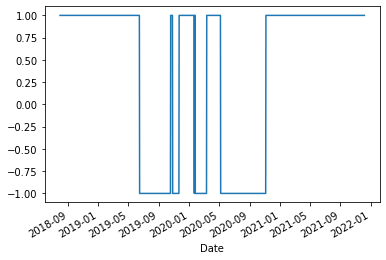

In [ ]:
btc_predictions_df["Predicted"].plot()

In [ ]:
eth_predictions_df = pd.DataFrame(index=eth_X_test.index)
eth_predictions_df['Predicted'] = eth_pred
eth_predictions_df['Actual Returns'] = eth_signals_df['Actual Returns']
eth_predictions_df['Strategy Returns'] = (
    eth_predictions_df['Actual Returns'] * eth_predictions_df['Predicted'])
display(eth_predictions_df.head())
display(eth_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-08-01,1.0,-0.030240,-0.030240
2018-08-02,1.0,-0.019313,-0.019313
2018-08-03,1.0,0.013671,0.013671
2018-08-04,1.0,-0.026323,-0.026323
2018-08-05,1.0,0.008015,0.008015


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-12-03,-1.0,-0.064415,0.064415
2021-12-04,-1.0,-0.023958,0.023958
2021-12-05,-1.0,0.019112,-0.019112
2021-12-06,-1.0,0.038209,-0.038209
2021-12-07,-1.0,-0.010020,0.010020


In [ ]:
ltc_predictions_df = pd.DataFrame(index=ltc_X_test.index)
ltc_predictions_df['Predicted'] = ltc_pred
ltc_predictions_df['Actual Returns'] = ltc_signals_df['Actual Returns']
ltc_predictions_df['Strategy Returns'] = (
    ltc_predictions_df['Actual Returns'] * ltc_predictions_df['Predicted'])
display(ltc_predictions_df.head())
display(ltc_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-08-01,-1.0,-0.023170,0.023170
2018-08-02,-1.0,-0.022051,0.022051
2018-08-03,-1.0,0.018344,-0.018344
2018-08-04,-1.0,-0.055933,0.055933
2018-08-05,-1.0,0.018999,-0.018999


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-12-03,-1.0,-0.075630,0.075630
2021-12-04,-1.0,-0.133158,0.133158
2021-12-05,-1.0,-0.040741,0.040741
2021-12-06,-1.0,0.035015,-0.035015
2021-12-07,-1.0,0.002510,-0.002510


In [ ]:
bch_predictions_df = pd.DataFrame(index=bch_X_test.index)
bch_predictions_df['Predicted'] = bch_pred
bch_predictions_df['Actual Returns'] = bch_signals_df['Actual Returns']
bch_predictions_df['Strategy Returns'] = (
    bch_predictions_df['Actual Returns'] * bch_predictions_df['Predicted'])
display(bch_predictions_df.head())
display(bch_predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
Date,,,
2018-08-01,1.0,-0.010033,-0.010033
2018-08-02,1.0,-0.044960,-0.044960
2018-08-03,1.0,-0.013679,-0.013679
2018-08-04,1.0,-0.039979,-0.039979
2018-08-05,1.0,0.019381,0.019381


,Predicted,Actual Returns,Strategy Returns
Date,,,
2021-12-03,1.0,-0.051822,-0.051822
2021-12-04,1.0,-0.109897,-0.109897
2021-12-05,1.0,-0.042968,-0.042968
2021-12-06,1.0,0.049100,0.049100
2021-12-07,1.0,-0.001254,-0.001254


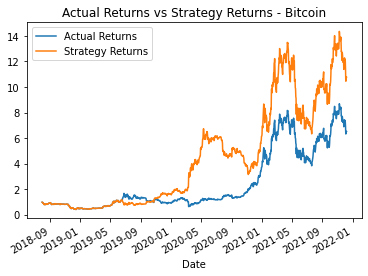

In [ ]:
# Plot the actual vs strategy returns
btc_plot=(1+ btc_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
title='Actual Returns vs Strategy Returns - Bitcoin')

btc_plot

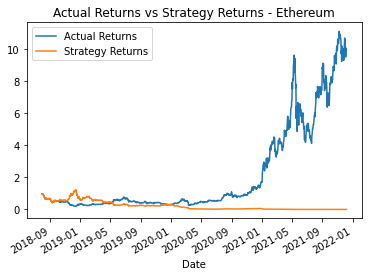

In [ ]:
eth_plot=(1+ eth_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
title='Actual Returns vs Strategy Returns - Ethereum')

eth_plot

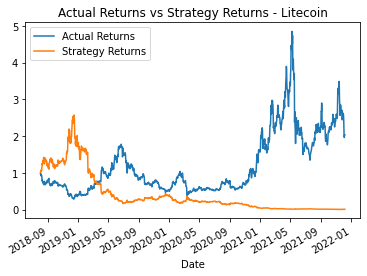

In [ ]:
ltc_plot=(1+ ltc_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
title='Actual Returns vs Strategy Returns - Litecoin')

ltc_plot

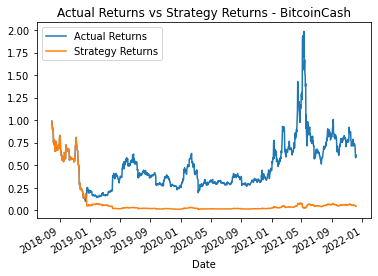

In [ ]:
bch_plot=(1+ bch_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(
title='Actual Returns vs Strategy Returns - BitcoinCash')
bch_plot

In [ ]:
# add entry/exit points to dataframe
btc_predictions_df["Entry/Exit"] = btc_predictions_df["Predicted"].diff()


In [ ]:
eth_predictions_df["Entry/Exit"] = eth_predictions_df["Predicted"].diff()


In [ ]:
ltc_predictions_df["Entry/Exit"] = ltc_predictions_df["Predicted"].diff()


In [ ]:
bch_predictions_df["Entry/Exit"] = bch_predictions_df["Predicted"].diff()


In [ ]:
alp_api = "PKMYYK0CVU0YYS2GPISF"
secret_key1 = "vEAlVemJ517D3xSempAmyA547YefB3g8IFfCiS1l"

In [ ]:
api = alpacaapi.REST(alp_api, secret_key1, "https://paper-api.alpaca.markets")

In [ ]:
# Fetch Account
account = api.get_account()

# Print Account Details
print(account.id, account.equity, account.status)

209a720e-2bcf-448e-bed5-9c8997e0f2cc 100027.9 ACTIVE


In [ ]:
btc_pred_only = btc_predictions_df.loc[:, ["Entry/Exit"]]
eth_pred_only = eth_predictions_df.loc[:, ["Entry/Exit"]]
ltc_pred_only = ltc_predictions_df.loc[:, ["Entry/Exit"]]
bch_pred_only = bch_predictions_df.loc[:, ["Entry/Exit"]]

In [ ]:
btc_predictions_df.tail()

,Predicted,Actual Returns,Strategy Returns,Entry/Exit
Date,,,,
2021-12-03,1.0,-0.050986,-0.050986,0.0
2021-12-04,1.0,-0.082046,-0.082046,0.0
2021-12-05,1.0,0.003418,0.003418,0.0
2021-12-06,1.0,0.024586,0.024586,0.0
2021-12-07,1.0,0.002322,0.002322,0.0


In [ ]:
btc_pred_only.head(50)

,Entry/Exit
Date,
2018-08-01,NaN
2018-08-02,0.0
2018-08-03,0.0
2018-08-04,0.0
2018-08-05,0.0
2018-08-06,0.0
2018-08-07,0.0
2018-08-08,0.0
2018-08-09,0.0


In [ ]:
#Instantiate buy order for all
api.submit_order(symbol="BTCUSD", qty=1,
    side='buy',
    type='market',
    time_in_force='day')
api.submit_order(symbol="ETHUSD", qty=1,
    side='buy',
    type='market',
    time_in_force='day')
api.submit_order(symbol="LTCUSD", qty=1,
    side='buy',
    type='market',
    time_in_force='day')
api.submit_order(symbol="BCHUSD", qty=1,
    side='buy',
    type='market',
    time_in_force='day')

Order({   'asset_class': 'crypto',
    'asset_id': '64b7df3b-a861-4ca5-9bc6-7c9cbdd41535',
    'canceled_at': None,
    'client_order_id': '3d05c0fe-56b5-4223-abf4-196597ede11a',
    'created_at': '2021-12-09T02:43:30.827803959Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': '936fa65d-8bec-4276-8a7a-bf319a8232b1',
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '1',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2021-12-09T02:43:30.826153239Z',
    'symbol': 'BCHUSD',
    'time_in_force': 'day',
    'trail_percent': None,
    'trail_price': None,
    'type': 'market',
    'updated_at': '2021-12-09T02:43:30.827803959Z'})

In [ ]:
if btc_pred_only["Entry/Exit"].iloc[-1] == 2.0:
    print("buy")
    api.submit_order(symbol='BTCUSD',
    qty=1,
    side='buy',
    type='market',
    time_in_force='day')
elif btc_pred_only["Entry/Exit"].iloc[-1]== -2.0:
    print("sell")
    api.submit_order(symbol='BTCUSD',
                      qty=1,
                      side='sell',
                      type='market',
                      time_in_force='day')
else: print("hold")    

hold


In [ ]:
if eth_pred_only["Entry/Exit"].iloc[-1] == 2.0:
    print("buy")
    api.submit_order(symbol='ETHUSD',
    qty=1,
    side='buy',
    type='market',
    time_in_force='day')
elif eth_pred_only["Entry/Exit"].iloc[-1] == -2.0:
    print("sell")
    api.submit_order(symbol='ETHUSD',
                      qty=1,
                      side='sell',
                      type='market',
                      time_in_force='day')
else: print("hold")    

hold


In [ ]:
if ltc_pred_only["Entry/Exit"].iloc[-1] == 2.0:
    print("buy")
    api.submit_order(symbol='LTCUSD',
    qty=1,
    side='buy',
    type='market',
    time_in_force='day')
elif ltc_pred_only["Entry/Exit"].iloc[-1] == -2.0:
    print("sell")
    api.submit_order(symbol='LTCUSD',
                      qty=1,
                      side='sell',
                      type='market',
                      time_in_force='day')
else: print("hold")    

hold


In [ ]:
if bch_pred_only["Entry/Exit"].iloc[-1] == 2.0:
    print("buy")
    api.submit_order(symbol='BCHUSD',
    qty=1,
    side='buy',
    type='market',
    time_in_force='day')
elif bch_pred_only["Entry/Exit"].iloc[-1] == -2.0:
    print("sell")
    api.submit_order(symbol='BCHUSD',
                      qty=1,
                      side='sell',
                      type='market',
                      time_in_force='day')
else: print("hold")    

hold
